##### Problem Statements

In this project I want to understands how the student's performance (test scores) is affecting  other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

#### I will be using the following lifecycle  for this project

###### ** Understanding the Problem Statement
###### ** Data Collection
###### ** Data Checks to perform
###### ** Exploratory data analysis
###### ** Data Pre-Processing
###### ** Model Training
###### ** Choosing best model

And my final step is to convert all this into modular proagramming to better my understanding in ML lifecycle code modularity

The data I used here is basically collected from kaggle:
datalink: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

In [75]:
# importing the neccesary libraies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [2]:
df =pd.read_csv("data/student_data.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Looking at the dataset we have no missing values

In [5]:
df.shape

(1000, 8)

In [7]:
# let's check for the type of data types available in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# let's check for unique valus available here
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
# let's look deep into our categorical data properly

print("Categories of 'gender' variable is: ", df["gender"].unique())
print("Categories of 'race_ethnicity' variable is: ", df["race_ethnicity"].unique())
print("Categories of 'parental_level_of_education' variable is: ", df["parental_level_of_education"].unique())
print("Categories of 'lunch' variable is: ", df["lunch"].unique())
print("Categories of 'test_preparation_course' variable is: ", df["test_preparation_course"].unique())



Categories of 'gender' variable is:  ['female' 'male']
Categories of 'race_ethnicity' variable is:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories of 'parental_level_of_education' variable is:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories of 'lunch' variable is:  ['standard' 'free/reduced']
Categories of 'test_preparation_course' variable is:  ['none' 'completed']


In [15]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_feature = [feature for feature in df.columns if df[feature].dtype == "O"]

print("There are {} numerical feautes: {}". format(len(num_features), num_features))
print("There are {} categorical features: {} ".format(len(cat_feature),cat_feature))

There are 3 numerical feautes: ['math_score', 'reading_score', 'writing_score']
There are 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


##### Looking at the data it can be seen that we are not having `Total_Score` column and `Average` column.

##### The total score will be the sum of all the scores in the exams i.e math_score, reading_score, writing_score
##### The Average will be the average of the total score a student has

In [16]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] =df["total_score"] / 3

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
# taking a look at where student gain full marks in all test
reading_full_score = df[df['reading_score'] == 100]['average_score'].count()
writing_full_score = df[df['writing_score'] == 100]['average_score'].count()
math_full_score = df[df['math_score'] == 100]['average_score'].count()

print(f'students with full marks in Maths: {math_full_score}')
print(f'students with full marks in Writing: {writing_full_score}')
print(f'students with full marks in Reading: {reading_full_score}')

students with full marks in Maths: 7
students with full marks in Writing: 14
students with full marks in Reading: 17


In [22]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f'students with less than 20 marks in Maths: {math_less_20}')
print(f'students with less than 20 marks in Writing: {writing_less_20}')
print(f'students with less than 20 marks in Reading: {reading_less_20}')

students with less than 20 marks in Maths: 4
students with less than 20 marks in Writing: 3
students with less than 20 marks in Reading: 1


# Visulaize! Visualize! Visualize!

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packa

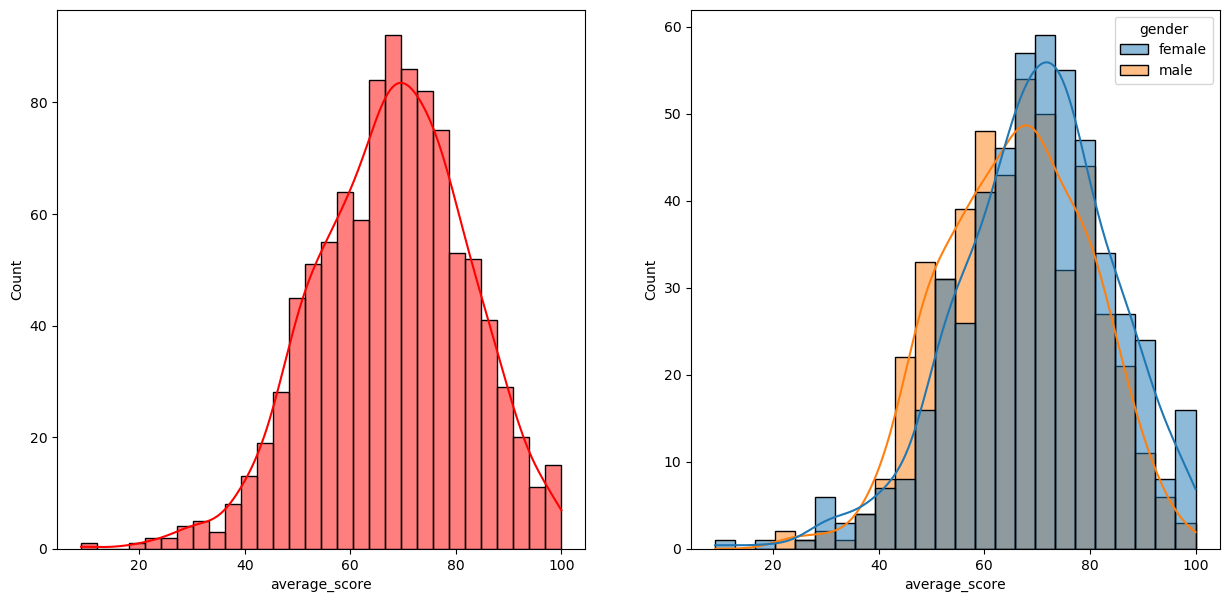

In [69]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x="average_score", bins=30, kde=True, color="r")
plt.subplot(122)
sns.histplot(data=df, x= "average_score",kde=True, hue="gender")
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packa

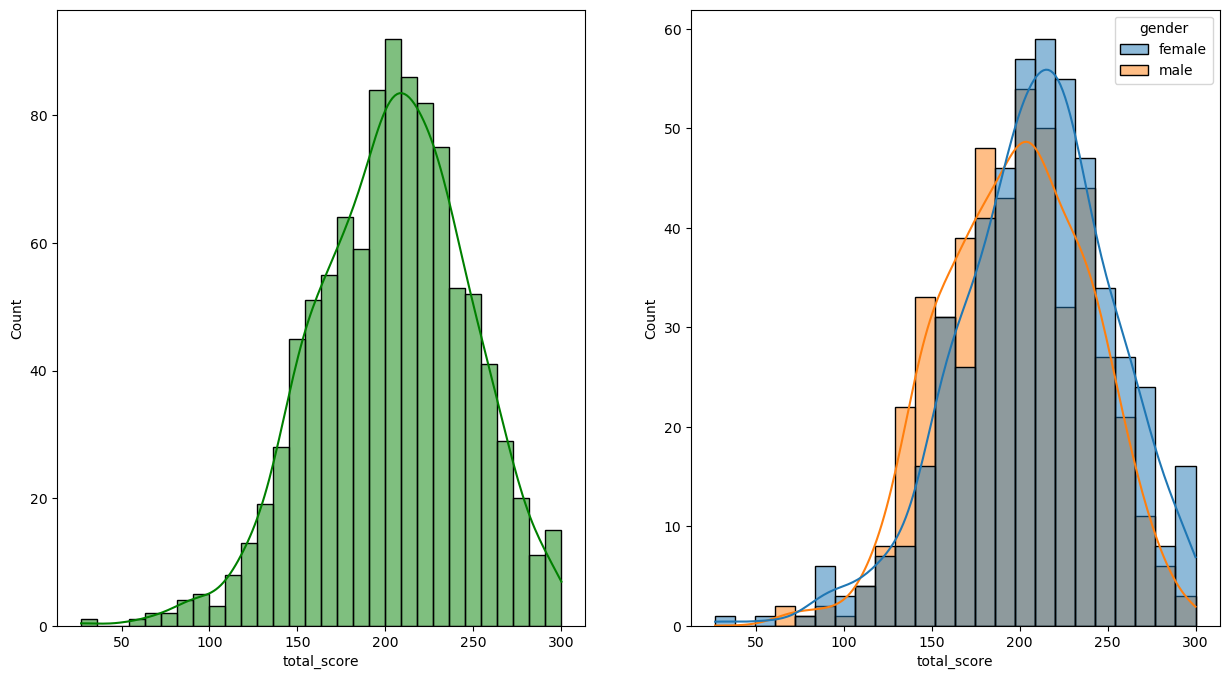

In [38]:
fig, axs = plt.subplots(1,5,figsize=(15,8))
plt.subplot(121)
sns.histplot(data=df, x="total_score", bins=30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="total_score", kde=True, hue="gender")
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packa

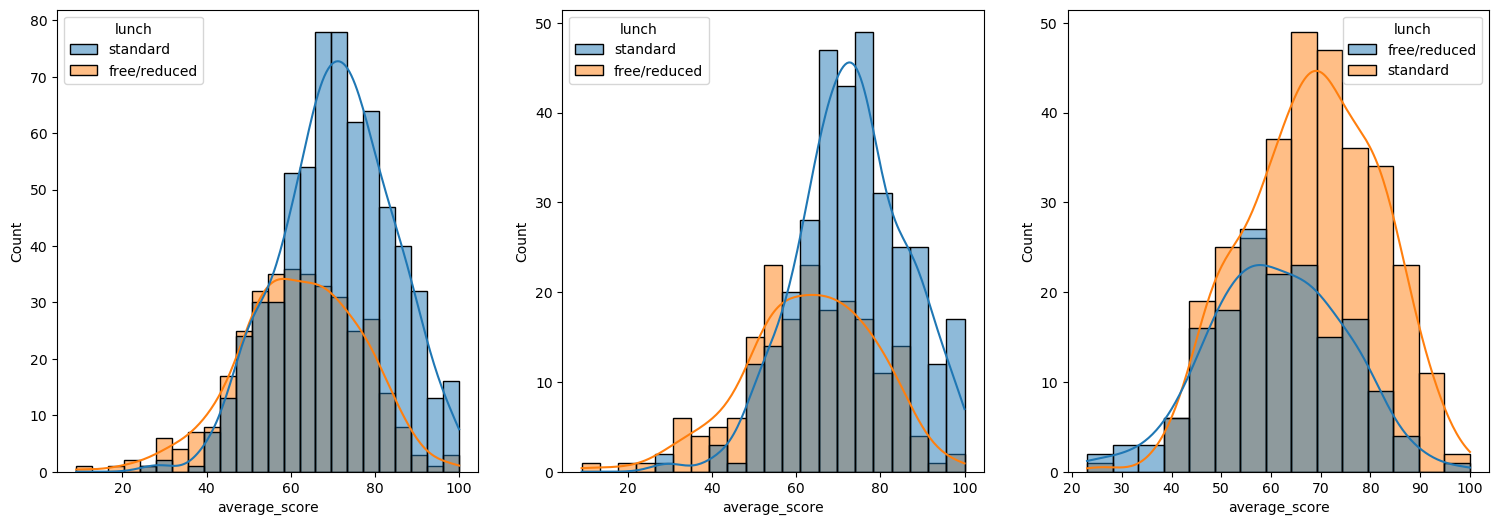

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

Max Score of Students from all subjects

In [42]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


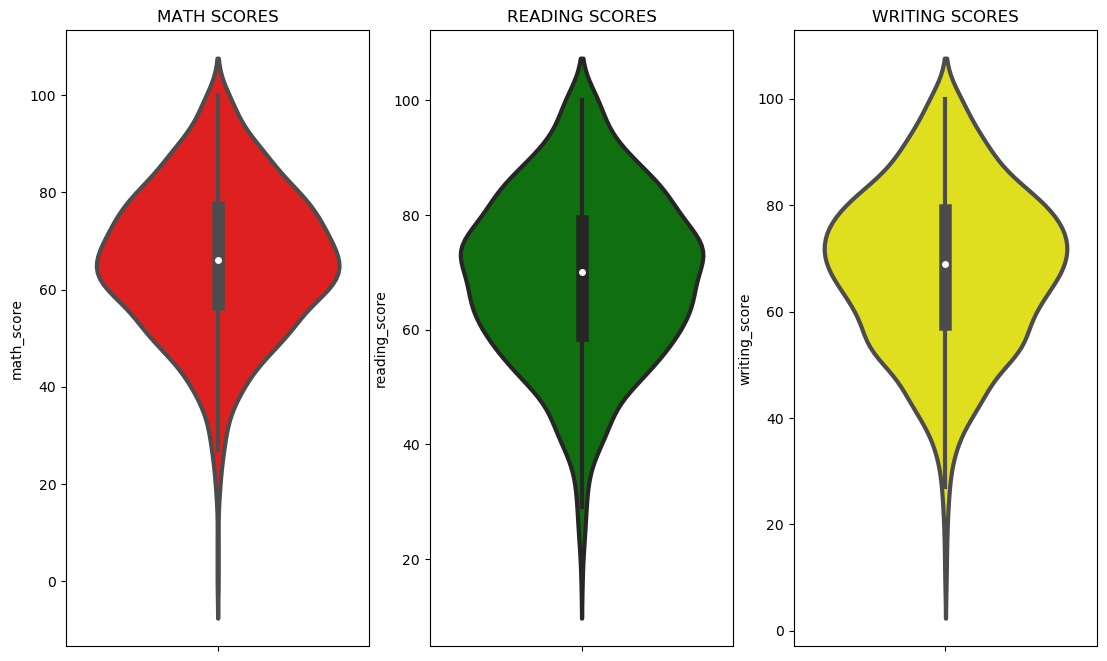

In [46]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='yellow',linewidth=3)
plt.show()

In [59]:
df.race_ethnicity.nunique

<bound method IndexOpsMixin.nunique of 0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race_ethnicity, Length: 1000, dtype: object>

In [55]:
df.lunch.nunique()

2

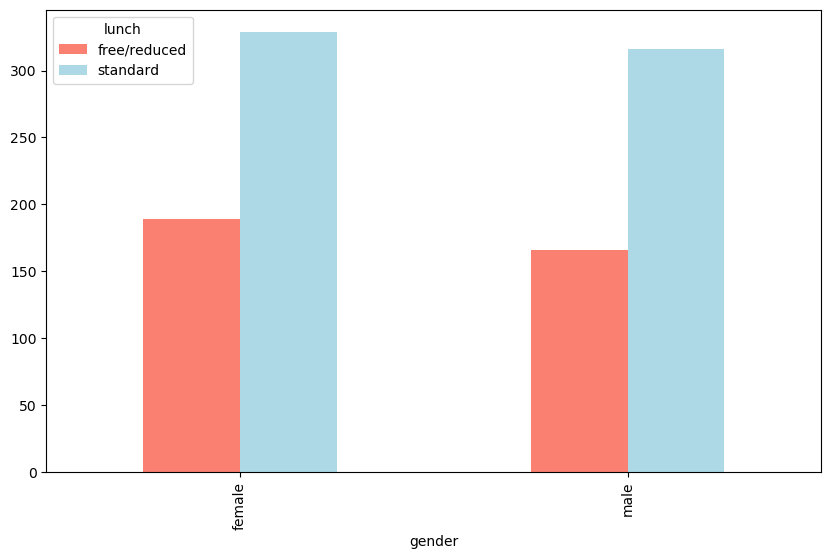

In [58]:
pd.crosstab(df.gender, df.lunch).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

In [65]:
df.race_ethnicity.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [76]:
X = df.drop(columns=["total_score"], axis=1)

In [78]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [100]:
y = df["math_score"]

In [101]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

### MODEL TRAINING

In [ ]:
# column transform 
numeric_feat = X.select_dtypes(exclude="object").columns
catergo_features = X.select_dtypes(include="object").columns

In [89]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transform = StandardScaler()
one_hot=OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot, catergo_features),
        ("StandardScaler", numeric_transform, numeric_feat)
    ]
)

In [94]:
X = preprocessor.fit_transform(X)

In [103]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 21), (200, 21))

In [97]:
# evaluation funciton
def model_evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square 

In [98]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tress Regressor": DecisionTreeRegressor(),
    "random Forest Regssor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "AdaBoostRegressor": AdaBoostRegressor()
    
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    
    # prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    # evaluate
    model_train_mae, model_train_rmse, model_train_r2 = model_evaluate(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = model_evaluate(y_test, y_test_pred)
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0090
- Mean Absolute Error: 0.8075
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0557
- Mean Absolute Error: 0.8312
- R2 Score: 0.9994


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0176
- Mean Absolute Error: 0.0143
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0193
- Mean Absolute Error: 0.0147
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.9448
- Mean Absolute Error: 4.6710
- R2 Score: 0.9803
-----------------------

In [99]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.999422
4,Decision Tress Regressor,0.997738
6,XGBRegressor,0.997648
5,random Forest Regssor,0.996446
7,CatBoostRegressor,0.994960
8,AdaBoostRegressor,0.992792
3,K-Neighbors Regressor,0.966842
